# CST383 - Final Project STUFF
## National Happiness
### Group 9 - Enigma Labs: Alonso Vega, Daniel Letterman, Gabe Williams, and Nicholas Fotinakes
---

## Intro

The objective of this project is to predict the overall happiness of a country and identify certain characteristics/features of a nation which may be strongly correlated with a higher happiness score. The happiness score is determined from the World Happiness Report which collects and determines a country’s happiness and ranking based off the Gallup World Poll in which life evaluation questions are asked of a countries population. Determining a nations state of happiness and correlating factors is important as this information is used by governments, health organizations, economists, psychologists and other organizations to influence research and policy-making decisions and assess the progress of a nation.

GOAL: Build a system to predict the Cantril Ladder based happiness score....blah blah finish

## Data Exploration
---

Import the required packages to explore data

In [4]:
#import packages 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# allow output to span multiple output lines in the console
pd.set_option('display.max_columns', 500)

# switch to seaborn default stylistic parameters
# see the useful https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set()
sns.set_context('paper') # 'talk' for slightly larger

# change default plot size
rcParams['figure.figsize'] = 9,7

Import dataset

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/nfotinakes/CST383_Final_Project/main/world-happiness-report-2021.csv')

How much data is there?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [5]:
df.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


How many NA values are in the data?

Does the dataset contain much obviously bad data?

What are the types of the columns?

## Initial Preprocessing

## Exploration and Visualization

Description:

In [12]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00
mean,5.53,0.06,5.65,5.42,9.43,0.81,64.99,0.79,-0.02,0.73,2.43,0.98,0.79,0.52,0.50,0.18,0.14,2.43
std,1.07,0.02,1.05,1.09,1.16,0.11,6.76,0.11,0.15,0.18,0.00,0.40,0.26,0.21,0.14,0.10,0.11,0.54
min,2.52,0.03,2.60,2.45,6.63,0.46,48.48,0.38,-0.29,0.08,2.43,0.00,0.00,0.00,0.00,0.00,0.00,0.65
25%,4.85,0.04,4.99,4.71,8.54,0.75,59.80,0.72,-0.13,0.67,2.43,0.67,0.65,0.36,0.41,0.10,0.06,2.14
50%,5.53,0.05,5.62,5.41,9.57,0.83,66.60,0.80,-0.04,0.78,2.43,1.02,0.83,0.57,0.51,0.16,0.10,2.51
75%,6.25,0.07,6.34,6.13,10.42,0.91,69.60,0.88,0.08,0.84,2.43,1.32,1.00,0.67,0.60,0.24,0.17,2.79
max,7.84,0.17,7.90,7.78,11.65,0.98,76.95,0.97,0.54,0.94,2.43,1.75,1.17,0.90,0.72,0.54,0.55,3.48


Overall Happiness of the first 10 countries(Country name)

In [21]:
happiness_by_country = df.groupby(['Country name'])['Ladder score'].mean()
print(happiness_by_country.head(10))

Country name
Afghanistan    2.523
Albania        5.117
Algeria        4.887
Argentina      5.929
Armenia        5.283
Australia      7.183
Austria        7.268
Azerbaijan     5.171
Bahrain        6.647
Bangladesh     5.025
Name: Ladder score, dtype: float64


Overall Happiness of the first 10 countries(Regional indicator)

In [22]:
happiness_by_country = df.groupby(['Regional indicator'])['Ladder score'].mean()
print(happiness_by_country.head(10))

Regional indicator
Central and Eastern Europe            5.984765
Commonwealth of Independent States    5.467000
East Asia                             5.810333
Latin America and Caribbean           5.908050
Middle East and North Africa          5.219765
North America and ANZ                 7.128500
South Asia                            4.441857
Southeast Asia                        5.407556
Sub-Saharan Africa                    4.494472
Western Europe                        6.914905
Name: Ladder score, dtype: float64


correlation matrix(darker colors shows stronger correlations/happiness)

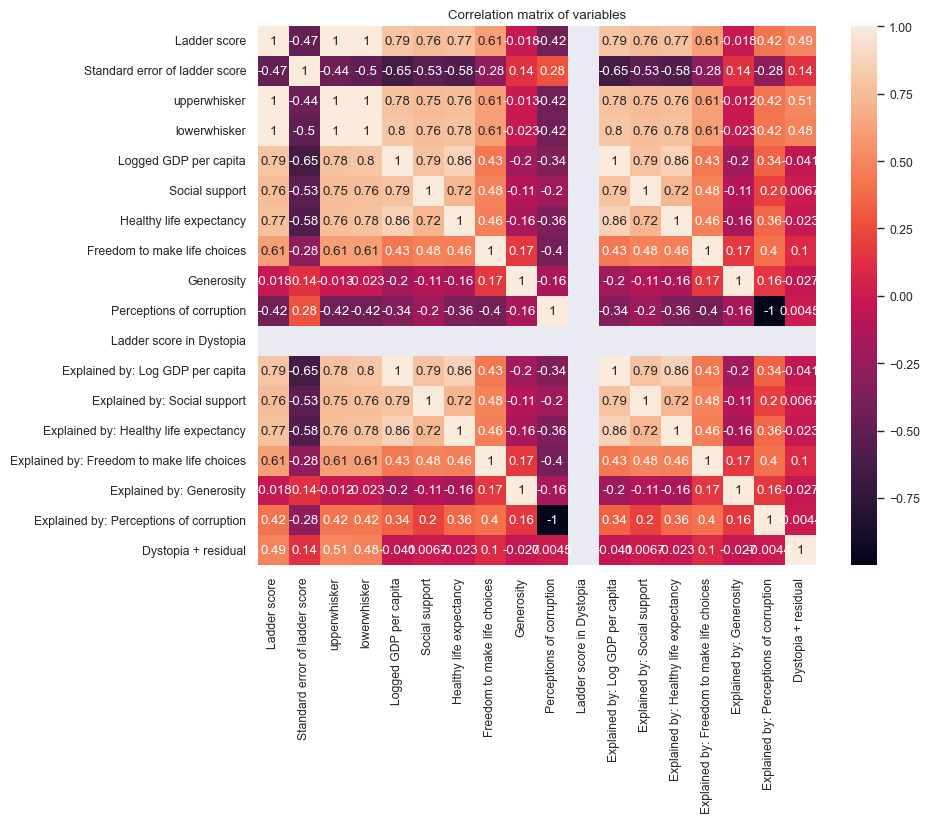

In [46]:
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation matrix of variables')
plt.show()

all of the numerical features

In [50]:
numeric_df = df.select_dtypes(include=['float64'])
summary_stats = numeric_df.describe()
print(summary_stats)

       Ladder score  Standard error of ladder score  upperwhisker  \
count    149.000000                      149.000000    149.000000   
mean       5.532839                        0.058752      5.648007   
std        1.073924                        0.022001      1.054330   
min        2.523000                        0.026000      2.596000   
25%        4.852000                        0.043000      4.991000   
50%        5.534000                        0.054000      5.625000   
75%        6.255000                        0.070000      6.344000   
max        7.842000                        0.173000      7.904000   

       lowerwhisker  Logged GDP per capita  Social support  \
count    149.000000             149.000000      149.000000   
mean       5.417631               9.432208        0.814745   
std        1.094879               1.158601        0.114889   
min        2.449000               6.635000        0.463000   
25%        4.706000               8.541000        0.750000   
50%   

A look at all of the numerical features as plots

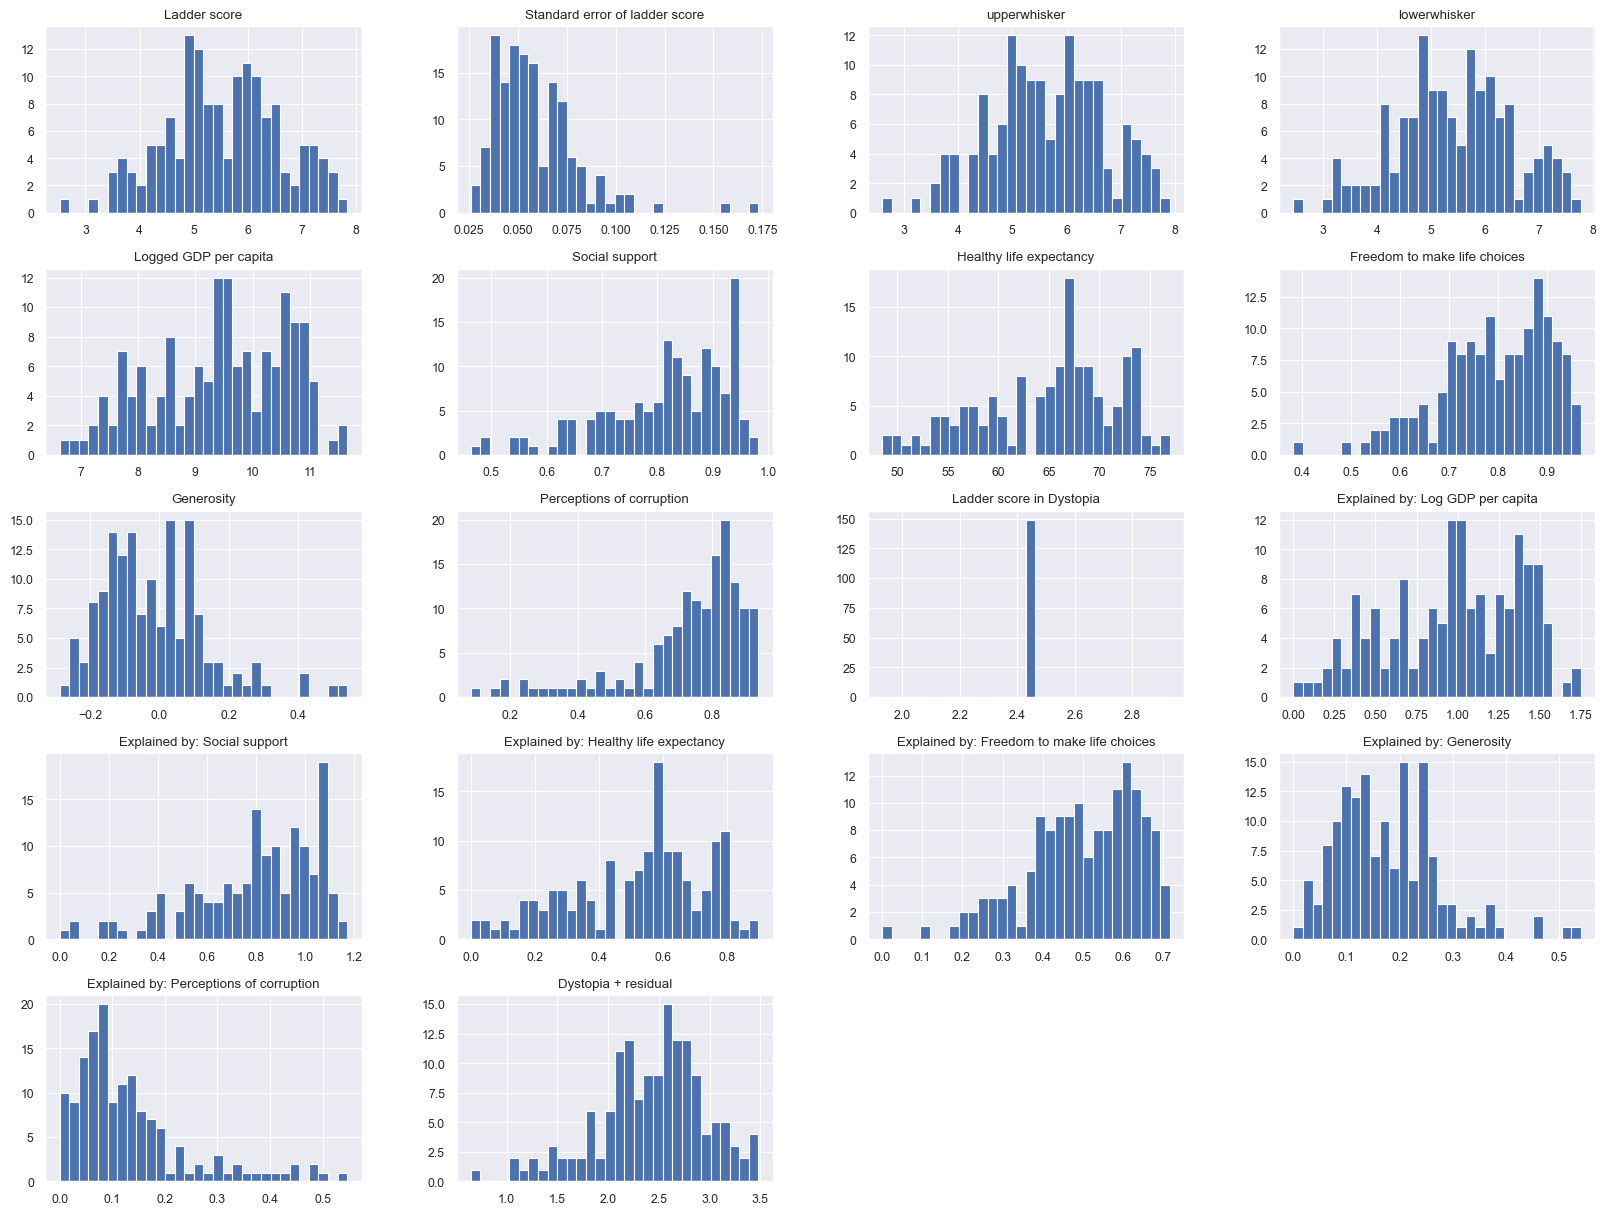

In [52]:
numeric_df = df.select_dtypes(include=['float64'])
numeric_df.hist(bins=30, figsize=(20,15))
plt.show()

A look at all of the numerical features as box plots

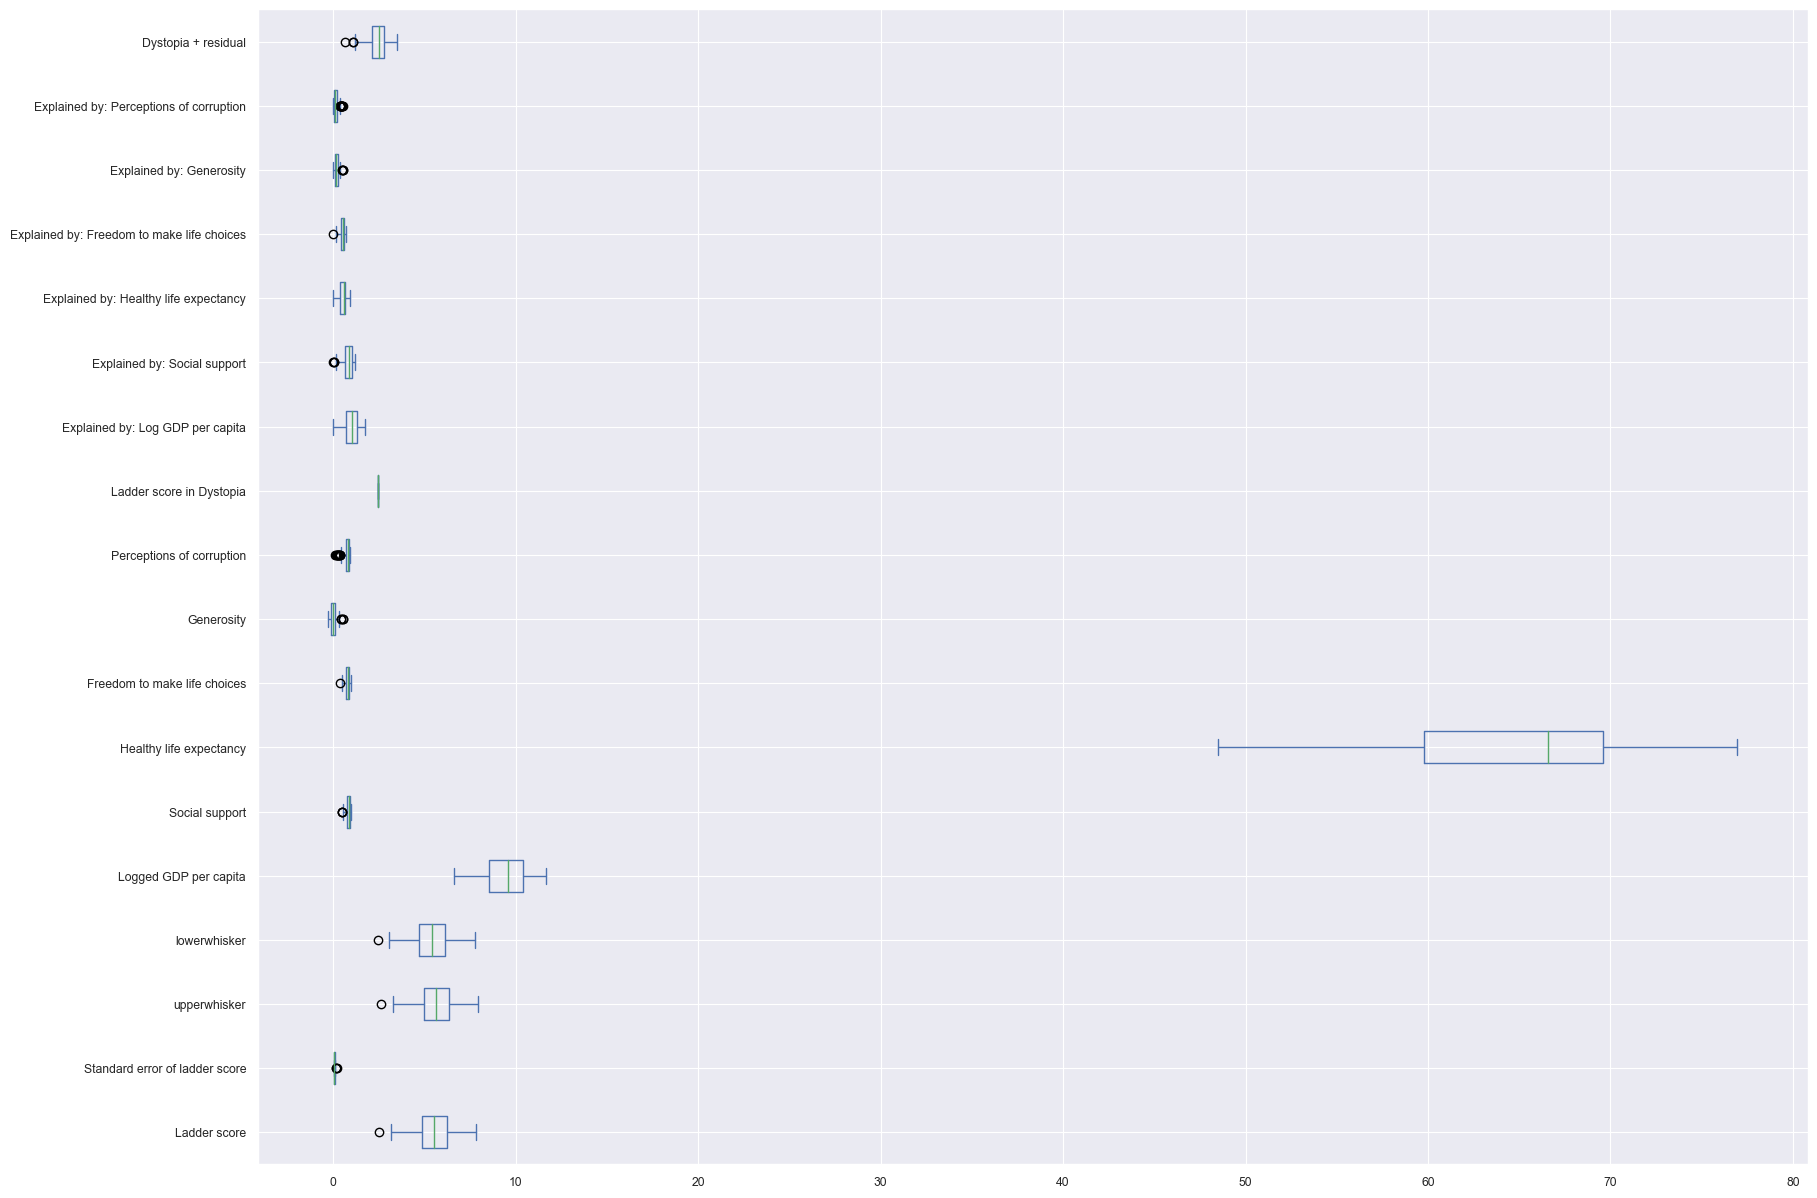

In [53]:
numeric_df = df.select_dtypes(include=['float64'])
numeric_df.plot(kind='box', figsize=(20,15), vert=False)
plt.show()

histograms of single numeric variables

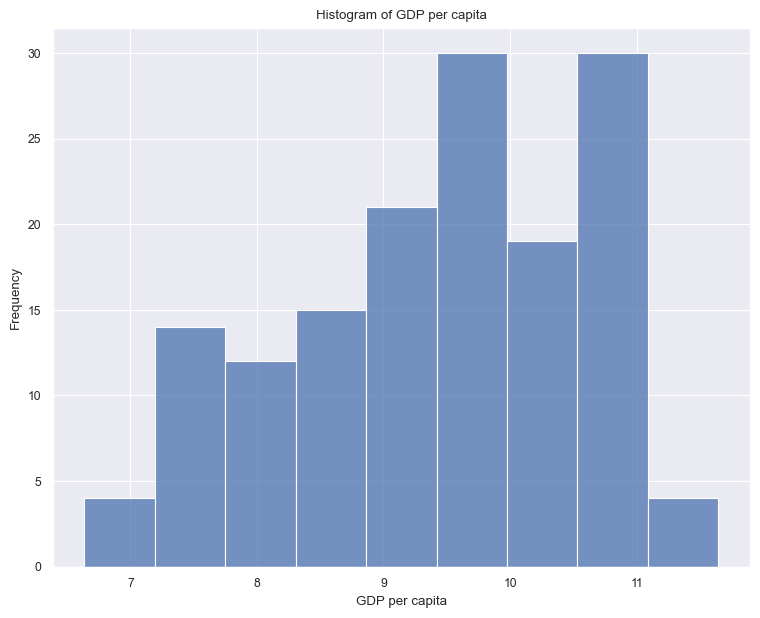

In [48]:
sns.histplot(df['Logged GDP per capita'], kde=False)
plt.title('Histogram of GDP per capita')
plt.xlabel('GDP per capita')
plt.ylabel('Frequency')
plt.show()


bar plots of value counts of single categorical variables


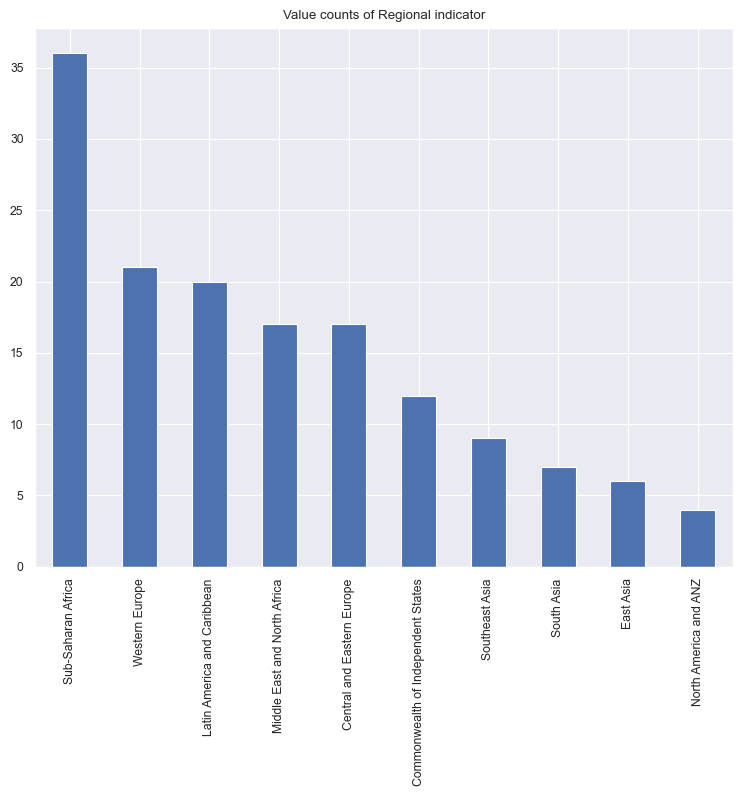

In [35]:
variable = 'Regional indicator'
counts = df[variable].value_counts()
counts.plot.bar()
plt.title(f'Value counts of {variable}')
plt.show()

grid of scatter plots (numeric variables)


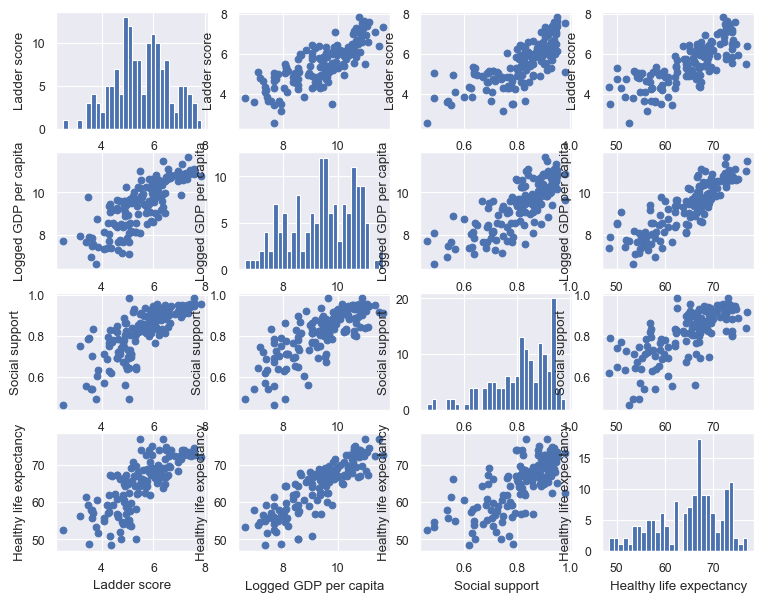

In [43]:
numeric_vars = ['Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy']
#amount of variables
var = len(numeric_vars)
#subplot combination of variables
for i in range(var):
    for j in range(var):
        plt.subplot(var, var, i * var + j + 1)
        if i == j:
            #diagonal/histograms
            df[numeric_vars[i]].hist(bins=30)
        else:
            #off-diagonal/scatter plots
            plt.scatter(df[numeric_vars[j]], df[numeric_vars[i]])
        plt.xlabel(numeric_vars[j])
        plt.ylabel(numeric_vars[i])
plt.show()

violin/bar plots for categorical/numeric variable pairs


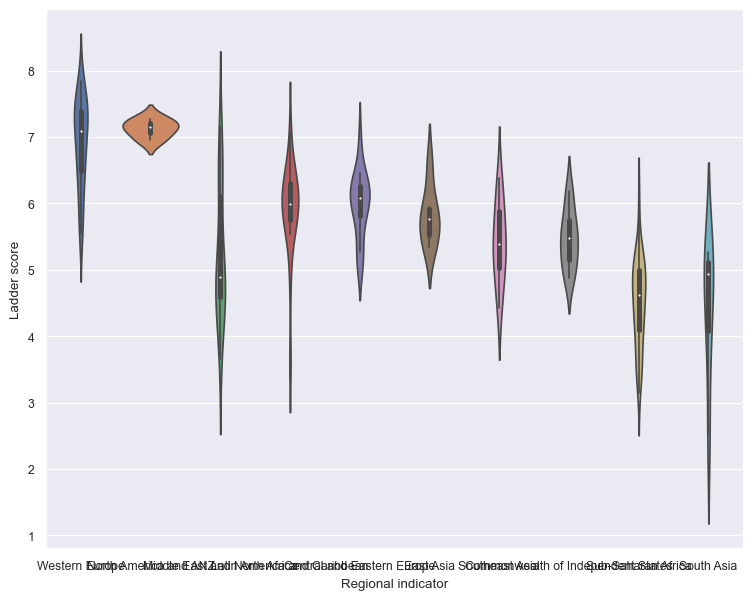

In [56]:
numeric_col = 'Ladder score'
categorical_col = 'Regional indicator'
sns.violinplot(x=categorical_col, y=numeric_col, data=df)
plt.show()

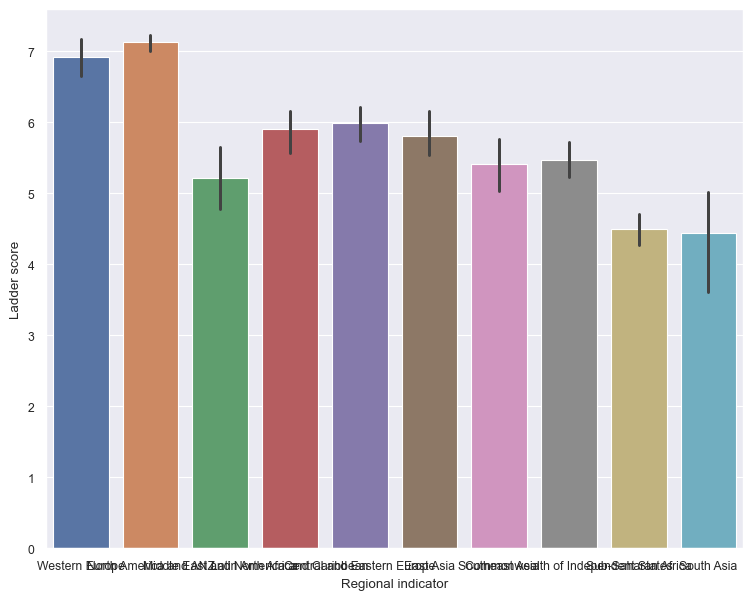

In [57]:
numeric_col = 'Ladder score'
categorical_col = 'Regional indicator'
sns.barplot(x=categorical_col, y=numeric_col, data=df)
plt.show()

three-variable plots, such as scatterplots with color or shape of points as a third variable, or grouped bar plots


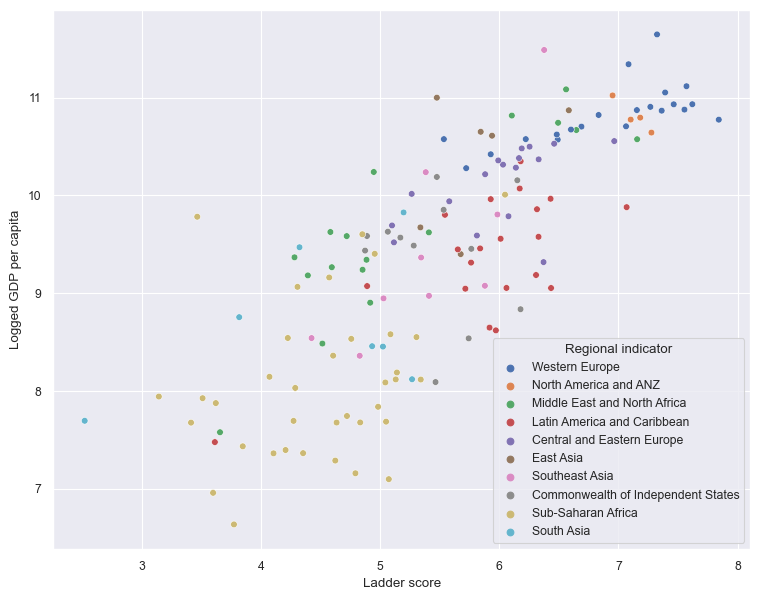

In [9]:
x_col = 'Ladder score'
y_col = 'Logged GDP per capita'
color_col = 'Regional indicator'
sns.scatterplot(x=x_col, y=y_col, hue=color_col, data=df)
plt.show()

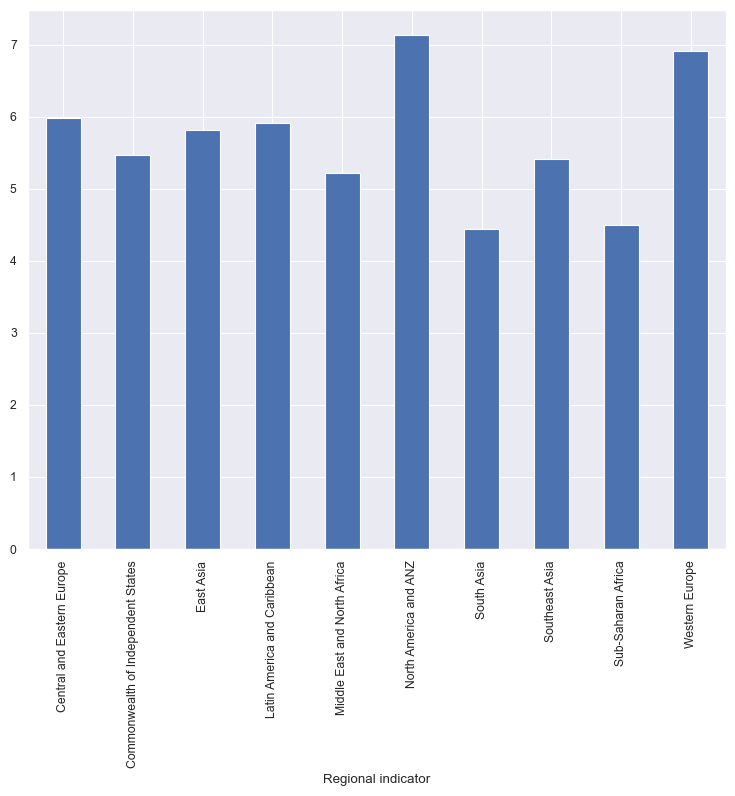

In [16]:
numeric_col = 'Ladder score'
group_col = 'Regional indicator'
grouped = df.groupby([group_col])
grouped_mean = grouped[numeric_col].mean()
grouped_mean.plot(kind='bar')
plt.show()

In [ ]:
ladder score showing overall happiness scores

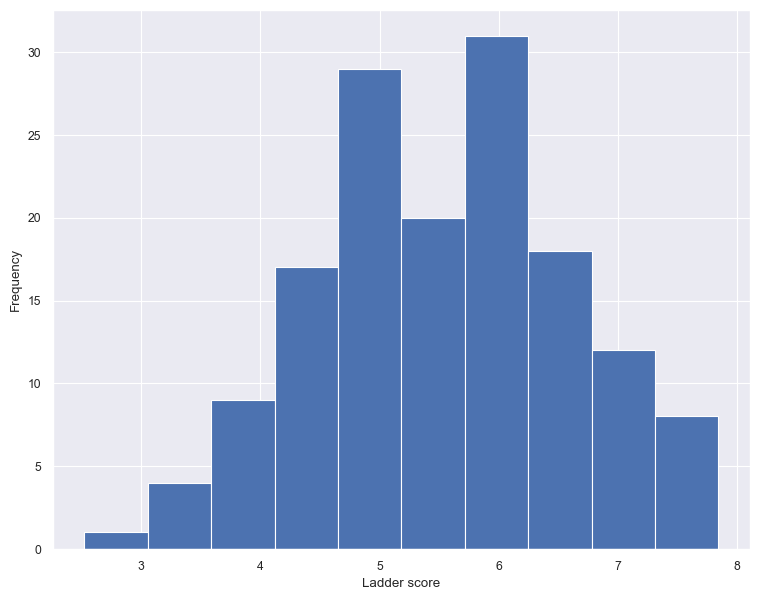

In [20]:
plt.hist(df["Ladder score"], bins=10)
plt.xlabel("Ladder score")
plt.ylabel("Frequency")
plt.show()

relationship between overall happiness and all factors

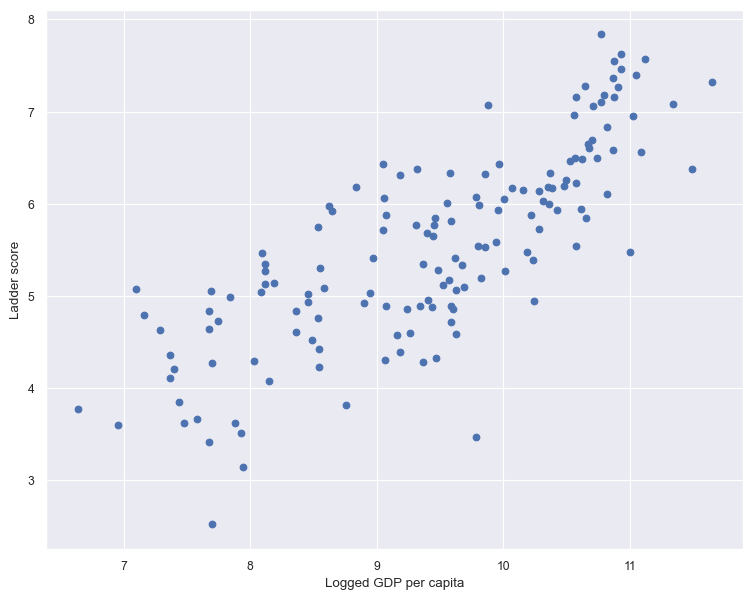

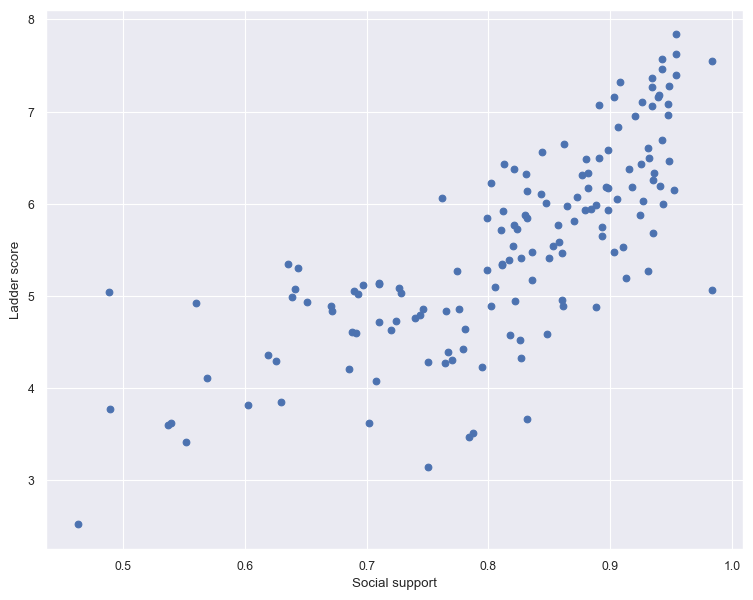

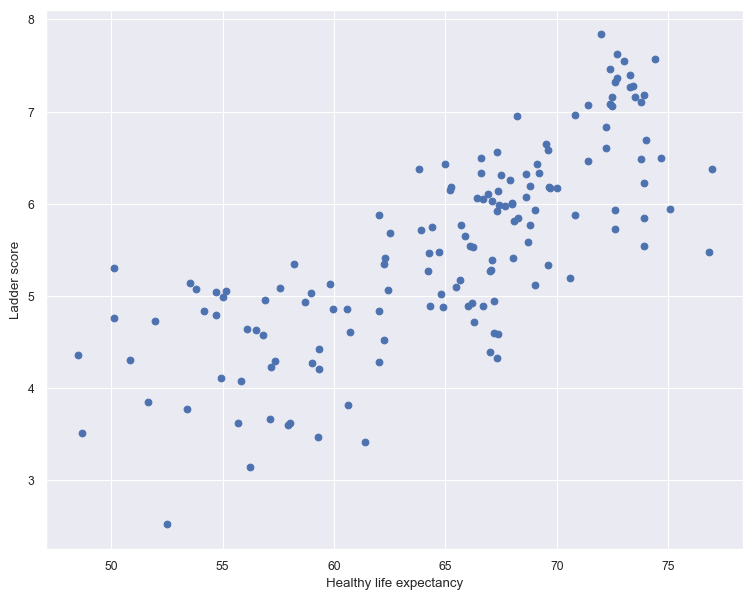

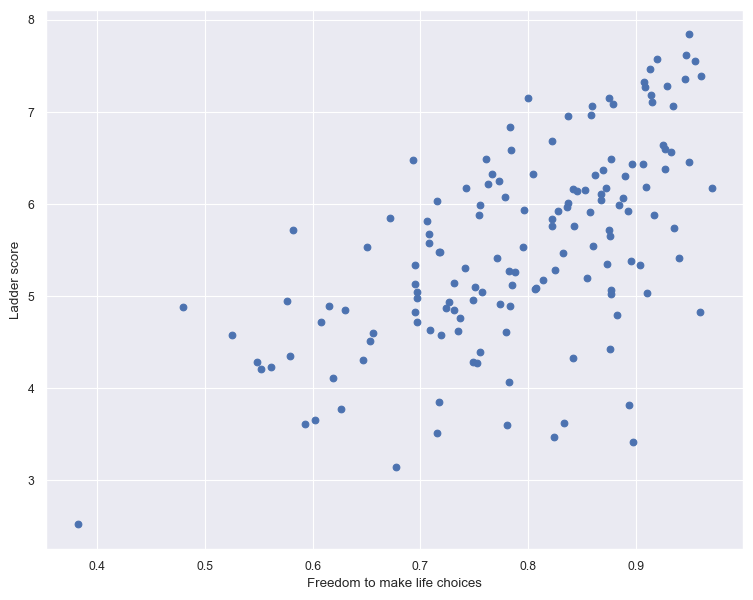

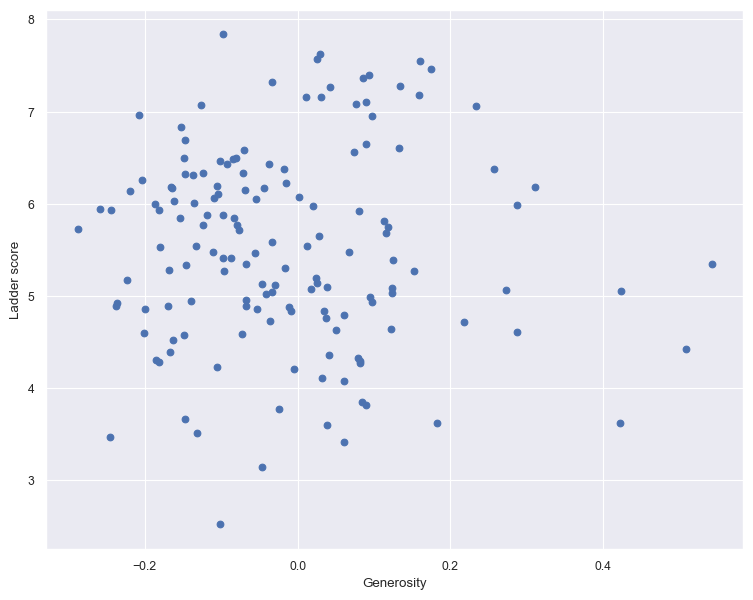

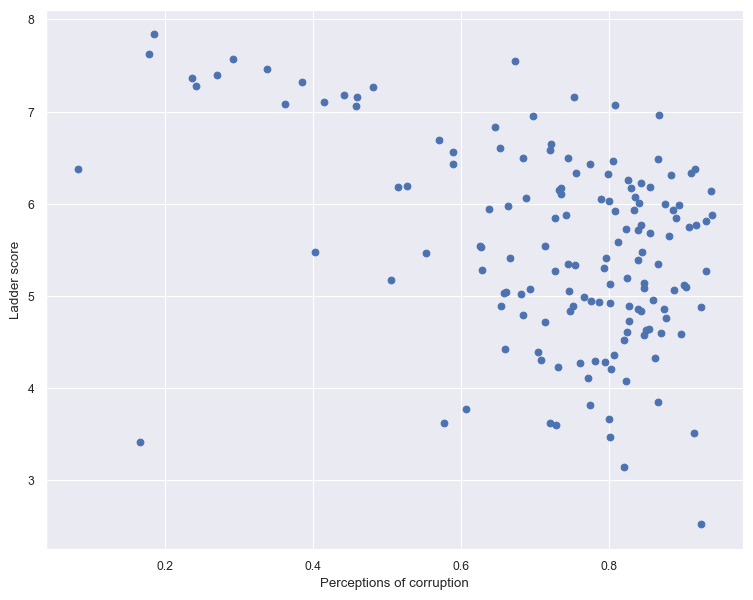

In [25]:
plt.scatter(df["Logged GDP per capita"], df["Ladder score"])
plt.xlabel("Logged GDP per capita")
plt.ylabel("Ladder score")
plt.show()

plt.scatter(df["Social support"], df["Ladder score"])

plt.xlabel("Social support")
plt.ylabel("Ladder score")
plt.show()

plt.scatter(df["Healthy life expectancy"], df["Ladder score"])
plt.xlabel("Healthy life expectancy")
plt.ylabel("Ladder score")
plt.show()

plt.scatter(df["Freedom to make life choices"], df["Ladder score"])
plt.xlabel("Freedom to make life choices")
plt.ylabel("Ladder score")
plt.show()

plt.scatter(df["Generosity"], df["Ladder score"])
plt.xlabel("Generosity")
plt.ylabel("Ladder score")
plt.show()
plt.scatter(df["Perceptions of corruption"], df["Ladder score"])

plt.xlabel("Perceptions of corruption")
plt.ylabel("Ladder score")
plt.show()

Healthy life expectancy: scatterplot of Ladder score vs Social support

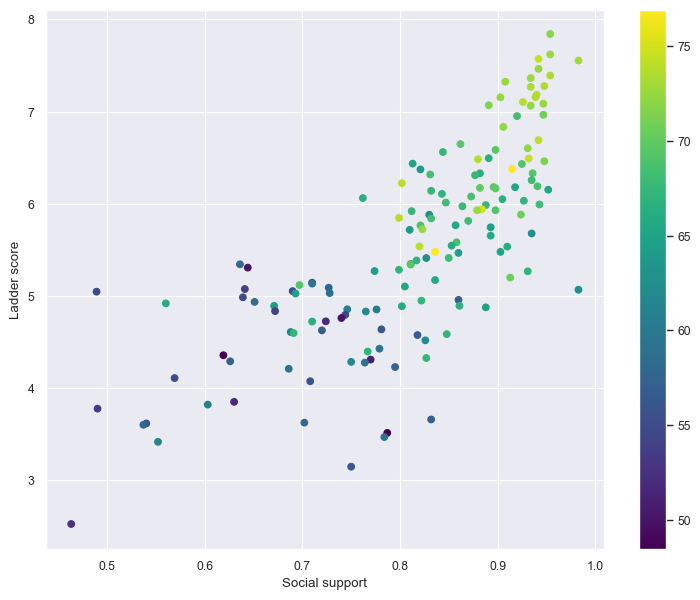

In [27]:
plt.scatter(df['Social support'], df['Ladder score'], c=df['Healthy life expectancy'], cmap='viridis')
plt.xlabel('Social support')
plt.ylabel('Ladder score')
plt.colorbar()
plt.show()

## Machine Learning